# Exercício 1

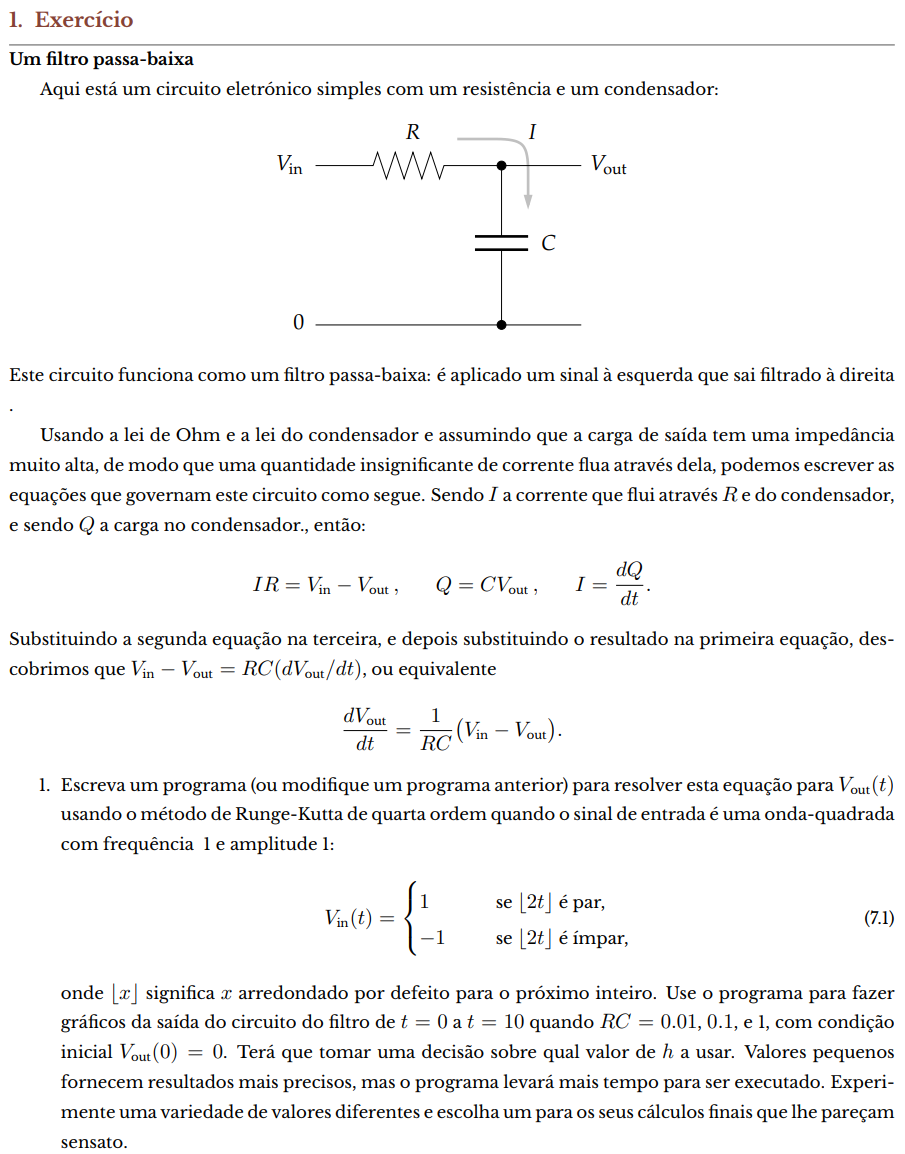
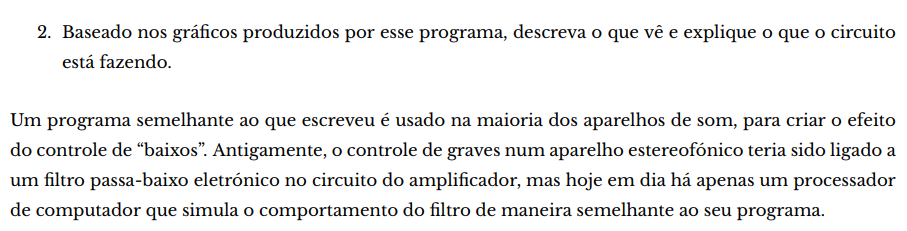

In [51]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

## Alínea 1

In [52]:
def rk4(start: float, end: float, func: Callable, N: int, x0: float) -> tuple[np.ndarray, np.ndarray]:
    """
        Resolve a equação `x'(t) = func(x, t)` usando o método de Runge-Kutta de Quarta Ordem Clássico começando em `start` e terminando em `end` com `N` passos sendo `x(start) = x0`.
    """

    # Passo
    h = (end - start) / N
    tt = np.linspace(start, end, N+1)
    xx = [x0]

    for step in range(N):
        xn = xx[step]
        tn = tt[step]

        k1 = func(xn, tn)
        k2 = func(xn + h/2 * k1, tn + h/2)
        k3 = func(xn + h/2 * k2, tn + h/2)
        k4 = func(xn + h * k3, tn + h)
        
        xx += [xn + h * (k1 + 2*k2 + 2*k3 + k4)/6]
    
    return tt, np.array(xx)


def Vin(tt: np.ndarray) -> np.ndarray:
    return np.where(np.floor(2*tt) % 2, -np.ones_like(tt), np.ones_like(tt))


def f(xx: np.ndarray, tt: np.ndarray, RC: float=1) -> np.ndarray:
    return (Vin(tt) - xx) / RC

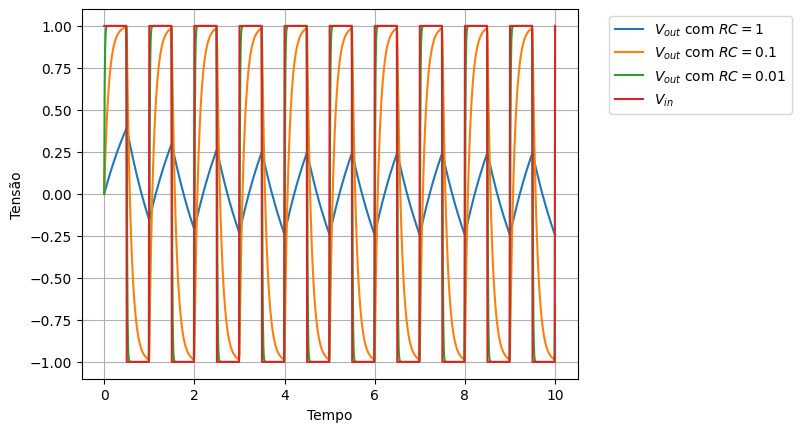

In [53]:
tt, Vout1 = rk4(0, 10, lambda x, t: f(x, t, 1), 1000, 0)
tt, Vout2 = rk4(0, 10, lambda x, t: f(x, t, 0.1), 1000, 0)
tt, Vout3 = rk4(0, 10, lambda x, t: f(x, t, 0.01), 1000, 0)

plt.plot(tt, Vout1, label="$V_{out}$ com $RC = 1$")
plt.plot(tt, Vout2, label="$V_{out}$ com $RC = 0.1$")
plt.plot(tt, Vout3, label="$V_{out}$ com $RC = 0.01$")
plt.plot(tt, Vin(tt), label="$V_{in}$")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Tempo")
plt.ylabel("Tensão")
plt.show()

## Alínea 2

O filtro remove as componentes do sinal de variação mais rápida, fazendo com que o sinal de saída apenas tenha as menores frequências, daí o nome filtro passa-baixo.

# Refazer com o Método Leapfrog

In [54]:
def leapfrog(start: float, end: float, func: Callable, N: int, x0: (float | np.ndarray)) -> tuple[np.ndarray, np.ndarray]:
    """
        Resolve o sistema de K EDOs `dx/dt = func(x, t)` usando o método Leapfrog começando em `start` e terminando em `end` com `N` passos sendo `x(start) = x0`.

        A função `func` deve aceitar dois argumentos: um array `x` com K entradas e um float `t`. O argumento `x0` deve também ter K entradas.

        ### Retorno
        tt: Array com os valores da variável independente `t`
        xx: Array com os resultados em função de `t` sendo que para K > 1 cada elemento do array é um array com o valor das várias funções em `t`.
    """

    # Passo
    h = (end - start) / N
    tt = [start]
    xx = [x0]

    # Valor de x(t + h/2)
    xleap = x0 + h * func(x0, start) / 2

    for step in range(N):
        xn = xx[step]
        tn = tt[step]

        # Valor de x(t + h)
        xh = xn + h * func(xleap, tn + h/2)
        th = tn + h

        # Valor de x(t + h * 3/2)
        xleap = xleap + h * func(xh, th)
        
        xx += [xh]
        tt += [th]
    
    return np.array(tt), np.array(xx)

C:\Users\Gui\AppData\Local\Temp\ipykernel_17192\721747138.py:30: RuntimeWarning: overflow encountered in double_scalars
  return (Vin(tt) - xx) / RC


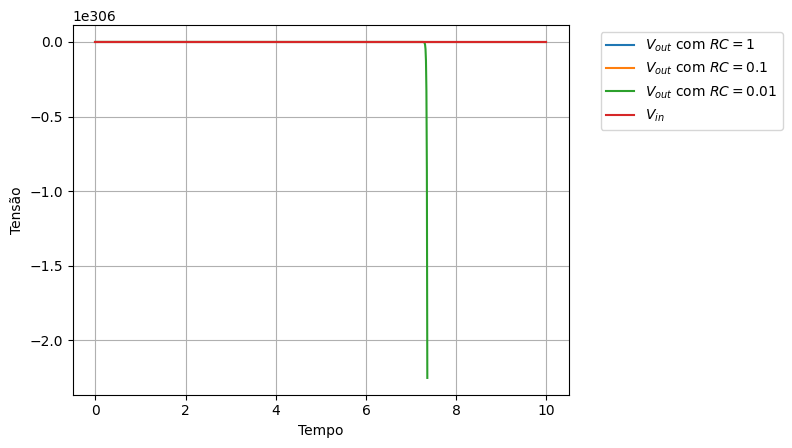

In [55]:
tt, Vout1 = leapfrog(0, 10, lambda x, t: f(x, t, 1), 1000, 0)
tt, Vout2 = leapfrog(0, 10, lambda x, t: f(x, t, 0.1), 1000, 0)
tt, Vout3 = leapfrog(0, 10, lambda x, t: f(x, t, 0.01), 1000, 0)

plt.plot(tt, Vout1, label="$V_{out}$ com $RC = 1$")
plt.plot(tt, Vout2, label="$V_{out}$ com $RC = 0.1$")
plt.plot(tt, Vout3, label="$V_{out}$ com $RC = 0.01$")
plt.plot(tt, Vin(tt), label="$V_{in}$")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Tempo")
plt.ylabel("Tensão")
plt.show()